# CO2 emission by Vehicles:

This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This is a compiled version. This contains data over a period of 7 years.

The dataset is available on Kaggle: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("CO2 Emissions_Canada.csv")
dataset.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Understanding the Data

Model	4WD/4X4 = Four-wheel drive

	AWD = All-wheel drive
	FFV = Flexible-fuel vehicle
	SWB = Short wheelbase
	LWB = Long wheelbase
	EWB = Extended wheelbase
    
Transmission	
    
    A = automatic
	AM = automated manual
	AS = automatic with select shift
	AV = continuously variable
	M = manual
	3 - 10 = Number of gears
    
Fuel type	
    
    X = regular gasoline
	Z = premium gasoline
	D = diesel
	E = ethanol (E85)
	N = natural gas
    
Fuel consumption:	City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

CO2 emissions:	the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving


# EDA

## Data Cleaning and Reorganizing

In [3]:
df = dataset.copy()

In [4]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Dropping irrelevant columns:

In [5]:
df.drop(['Make','Model','Vehicle Class'],axis=1,inplace=True)

In [6]:
dataset['Transmission'].value_counts()

AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: Transmission, dtype: int64

#### We can seperate the Number of Gears and Transmission Type from the Transmission column into seperate columns. 

### Writing a function to seperate numbers from text and make it into desired number-number format:
        

In [7]:
import re


def transmission_type(text): #For transmission type
    
    x = re.findall(r'([A-Z]+)',text) # finding the text in the given string and storing it in variable x
    for i in x:
        transmission = i #looping through the list x 

    return transmission


def number_of_gears(text): # for number of gears
    
    x = re.findall(r'([0-9]+)',text) # finding the number in the given string and storing it in variable x
    for i in x:
        return int(i) #looping through the list x and casting the number into int





### Testing the functions:

In [8]:
func_test = number_of_gears('AS4')

print(func_test)
print(type(func_test))

4
<class 'int'>


In [9]:
func_test = transmission_type('AS4')

print(func_test)
print(type(func_test))

AS
<class 'str'>


#### The function works as expected and required. Now we can seperate the Number of Gears from the transmission type.

In [10]:
df['Number_of_gears'] = df['Transmission'].apply(number_of_gears)
df['Transmission_type'] = df['Transmission'].apply(transmission_type)

### Dropping the Transmission column

In [11]:
df.drop('Transmission',axis=1,inplace=True)

In [12]:
df.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Number_of_gears,Transmission_type
0,2.0,4,Z,9.9,6.7,8.5,33,196,5.0,AS
1,2.4,4,Z,11.2,7.7,9.6,29,221,6.0,M
2,1.5,4,Z,6.0,5.8,5.9,48,136,7.0,AV
3,3.5,6,Z,12.7,9.1,11.1,25,255,6.0,AS
4,3.5,6,Z,12.1,8.7,10.6,27,244,6.0,AS


### Converting the Fuel Consumption columns from L/100 km to kmpl (kilometer per litre)

In [13]:
df['fuel_consumption_city(kmpl)'] = round(100/df['Fuel Consumption City (L/100 km)'],3)
df['fuel_consumption_hwy(kmpl)'] = round(100/df['Fuel Consumption Hwy (L/100 km)'],3)
df['fuel_consumption_comb(kmpl)'] = round(100/df['Fuel Consumption Comb (L/100 km)'],3)

### Dropping the Fuel Consumptions in L/100 columns

In [14]:
df.drop(['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)',
        'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)'],axis=1,inplace=True)

In [15]:
df.head()

,Engine Size(L),Cylinders,Fuel Type,CO2 Emissions(g/km),Number_of_gears,Transmission_type,fuel_consumption_city(kmpl),fuel_consumption_hwy(kmpl),fuel_consumption_comb(kmpl)
0,2.0,4,Z,196,5.0,AS,10.101,14.925,11.765
1,2.4,4,Z,221,6.0,M,8.929,12.987,10.417
2,1.5,4,Z,136,7.0,AV,16.667,17.241,16.949
3,3.5,6,Z,255,6.0,AS,7.874,10.989,9.009
4,3.5,6,Z,244,6.0,AS,8.264,11.494,9.434


### Rearranging the columns:

In [16]:
df.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Type', 'CO2 Emissions(g/km)',
       'Number_of_gears', 'Transmission_type', 'fuel_consumption_city(kmpl)',
       'fuel_consumption_hwy(kmpl)', 'fuel_consumption_comb(kmpl)'],
      dtype='object')

In [17]:
cols_rearranged = ['Engine Size(L)', 'Cylinders', 'Fuel Type','Transmission_type',
       'Number_of_gears', 'fuel_consumption_city(kmpl)',
       'fuel_consumption_hwy(kmpl)', 'fuel_consumption_comb(kmpl)', 'CO2 Emissions(g/km)']

df = df[cols_rearranged]

In [18]:
df.head()

,Engine Size(L),Cylinders,Fuel Type,Transmission_type,Number_of_gears,fuel_consumption_city(kmpl),fuel_consumption_hwy(kmpl),fuel_consumption_comb(kmpl),CO2 Emissions(g/km)
0,2.0,4,Z,AS,5.0,10.101,14.925,11.765,196
1,2.4,4,Z,M,6.0,8.929,12.987,10.417,221
2,1.5,4,Z,AV,7.0,16.667,17.241,16.949,136
3,3.5,6,Z,AS,6.0,7.874,10.989,9.009,255
4,3.5,6,Z,AS,6.0,8.264,11.494,9.434,244


## Analysing the Data

In [19]:
df.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Type', 'Transmission_type',
       'Number_of_gears', 'fuel_consumption_city(kmpl)',
       'fuel_consumption_hwy(kmpl)', 'fuel_consumption_comb(kmpl)',
       'CO2 Emissions(g/km)'],
      dtype='object')

In [20]:
df.shape

(7385, 9)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Engine Size(L)               7385 non-null   float64
 1   Cylinders                    7385 non-null   int64  
 2   Fuel Type                    7385 non-null   object 
 3   Transmission_type            7385 non-null   object 
 4   Number_of_gears              7090 non-null   float64
 5   fuel_consumption_city(kmpl)  7385 non-null   float64
 6   fuel_consumption_hwy(kmpl)   7385 non-null   float64
 7   fuel_consumption_comb(kmpl)  7385 non-null   float64
 8   CO2 Emissions(g/km)          7385 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 519.4+ KB


### Check for null values:

In [22]:
df.isnull().sum()

Engine Size(L)                   0
Cylinders                        0
Fuel Type                        0
Transmission_type                0
Number_of_gears                295
fuel_consumption_city(kmpl)      0
fuel_consumption_hwy(kmpl)       0
fuel_consumption_comb(kmpl)      0
CO2 Emissions(g/km)              0
dtype: int64

The 295 null values in the Number_of_gears comes from the AV category of vehicles. AV refers to continously variable and we can assign it 0 since it does not have gears.

In [23]:
df['Number_of_gears'].fillna(0,inplace=True)

In [24]:
df.isnull().sum()

Engine Size(L)                 0
Cylinders                      0
Fuel Type                      0
Transmission_type              0
Number_of_gears                0
fuel_consumption_city(kmpl)    0
fuel_consumption_hwy(kmpl)     0
fuel_consumption_comb(kmpl)    0
CO2 Emissions(g/km)            0
dtype: int64

### Describing the data:

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.900,2.000,3.000,3.700,8.40
Cylinders,7385.0,5.615030,1.828307,3.000,4.000,6.000,6.000,16.00
Number_of_gears,7385.0,6.611510,1.795264,0.000,6.000,6.000,8.000,10.00
fuel_consumption_city(kmpl),7385.0,8.603876,2.539148,3.268,6.849,8.264,9.901,23.81
fuel_consumption_hwy(kmpl),7385.0,11.684673,2.690151,4.854,9.804,11.494,13.333,25.00
fuel_consumption_comb(kmpl),7385.0,9.736521,2.559452,3.831,7.937,9.434,11.236,24.39
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.000,208.000,246.000,288.000,522.00


### Check for value counts in the Categorical features:

### Fuel type	

In [26]:
df['Fuel Type'].value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel Type, dtype: int64

    X = regular gasoline
	Z = premium gasoline
	D = diesel
	E = ethanol (E85)
	N = natural gas

### Transmission Type

In [27]:
df['Transmission_type'].value_counts()

AS    3127
A     1851
M     1185
AM     646
AV     576
Name: Transmission_type, dtype: int64

    A = automatic
	AM = automated manual
	AS = automatic with select shift
	AV = continuously variable
	M = manual

### Visualizing the data:

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Engine Size(L)               7385 non-null   float64
 1   Cylinders                    7385 non-null   int64  
 2   Fuel Type                    7385 non-null   object 
 3   Transmission_type            7385 non-null   object 
 4   Number_of_gears              7385 non-null   float64
 5   fuel_consumption_city(kmpl)  7385 non-null   float64
 6   fuel_consumption_hwy(kmpl)   7385 non-null   float64
 7   fuel_consumption_comb(kmpl)  7385 non-null   float64
 8   CO2 Emissions(g/km)          7385 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 519.4+ KB


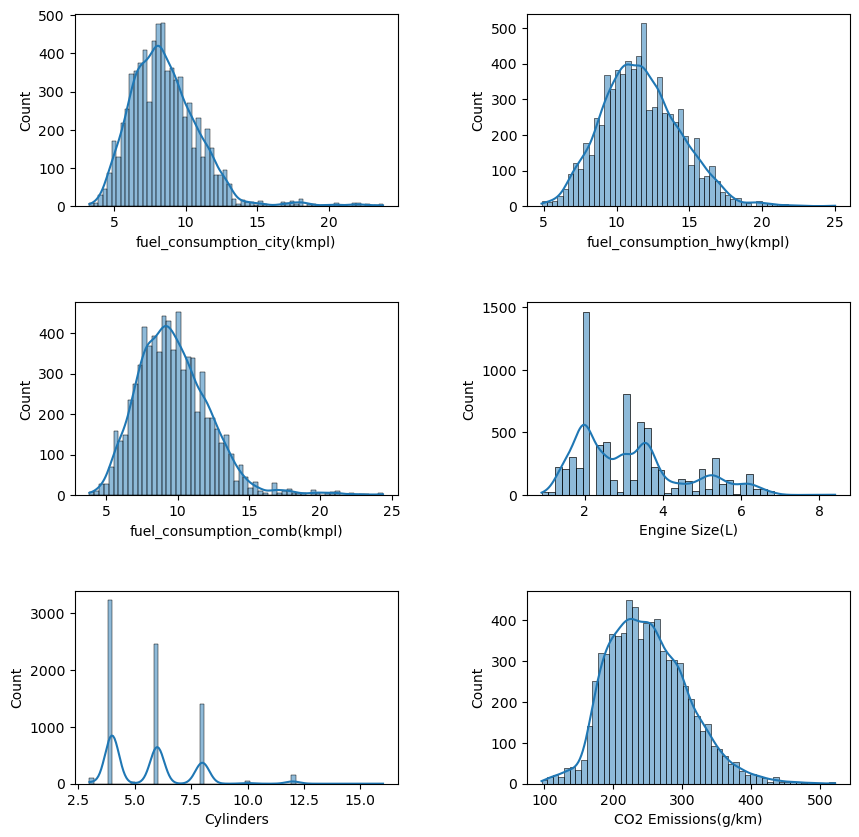

In [29]:
fig,ax = plt.subplots(3,2)
fig.set_figwidth(10)
fig.set_figheight(10)
plt.subplots_adjust(hspace=0.5,wspace=0.4)

sns.histplot(df['fuel_consumption_city(kmpl)'],kde=True,ax=ax[0][0])
sns.histplot(df['fuel_consumption_hwy(kmpl)'],kde=True,ax=ax[0][1])
sns.histplot(df['fuel_consumption_comb(kmpl)'],kde=True,ax=ax[1][0])
sns.histplot(df['Engine Size(L)'],kde=True,ax=ax[1][1])
sns.histplot(df['Cylinders'],kde=True,ax=ax[2][0])
sns.histplot(df['CO2 Emissions(g/km)'],kde=True,ax=ax[2][1])


plt.show()

### Check for Outliers

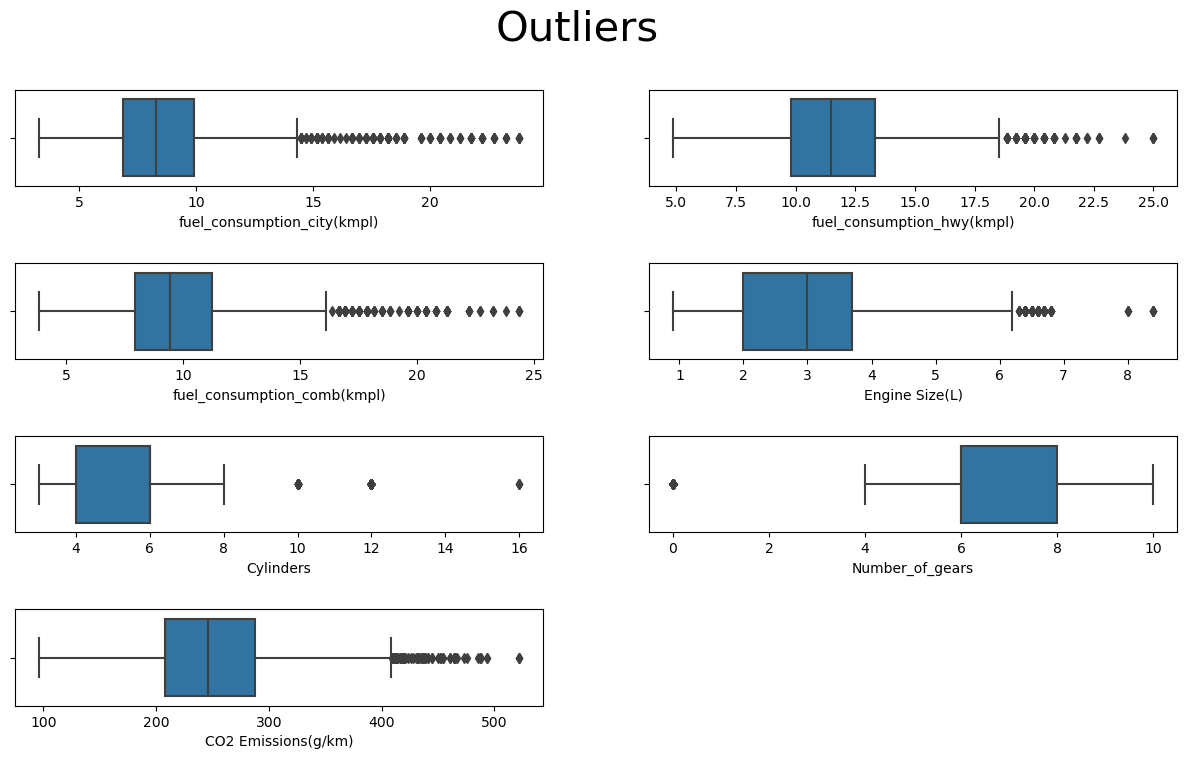

In [30]:
plt.figure(figsize=(15,8))

plt.subplots_adjust(hspace=0.8,wspace=0.2)

plt.subplot(4,2,1)
sns.boxplot(df['fuel_consumption_city(kmpl)'])

plt.subplot(4,2,2)
sns.boxplot(df['fuel_consumption_hwy(kmpl)'])

plt.subplot(4,2,3)
sns.boxplot(df['fuel_consumption_comb(kmpl)'])

plt.subplot(4,2,4)
sns.boxplot(df['Engine Size(L)'])

plt.subplot(4,2,5)
sns.boxplot(df['Cylinders'])

plt.subplot(4,2,6)
sns.boxplot(df['Number_of_gears'])

plt.subplot(4,2,7)
sns.boxplot(df['CO2 Emissions(g/km)'])

plt.suptitle('Outliers',fontsize=30)
plt.show()

### Handling the Outliers:

In [31]:
outlier = []

def outlier_iqr(data): #making a function to detect outlier using IQR 
    
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    lower_fence = q1-(1.5*iqr)
    higher_fence = q3+(1.5*iqr)
    
    for index,row in data.items():
        if row < lower_fence or row > higher_fence:
            outlier.append(row)
    return outlier

In [32]:
outlier_cols = ['Engine Size(L)','fuel_consumption_city(kmpl)',
                'fuel_consumption_hwy(kmpl)', 'fuel_consumption_comb(kmpl)','CO2 Emissions(g/km)']

In [33]:
for col in outlier_cols:
    outlier_iqr(df[col])
    col_median = df[col].median()
    for i in outlier:
         df[col] = df[col].replace(i,col_median)

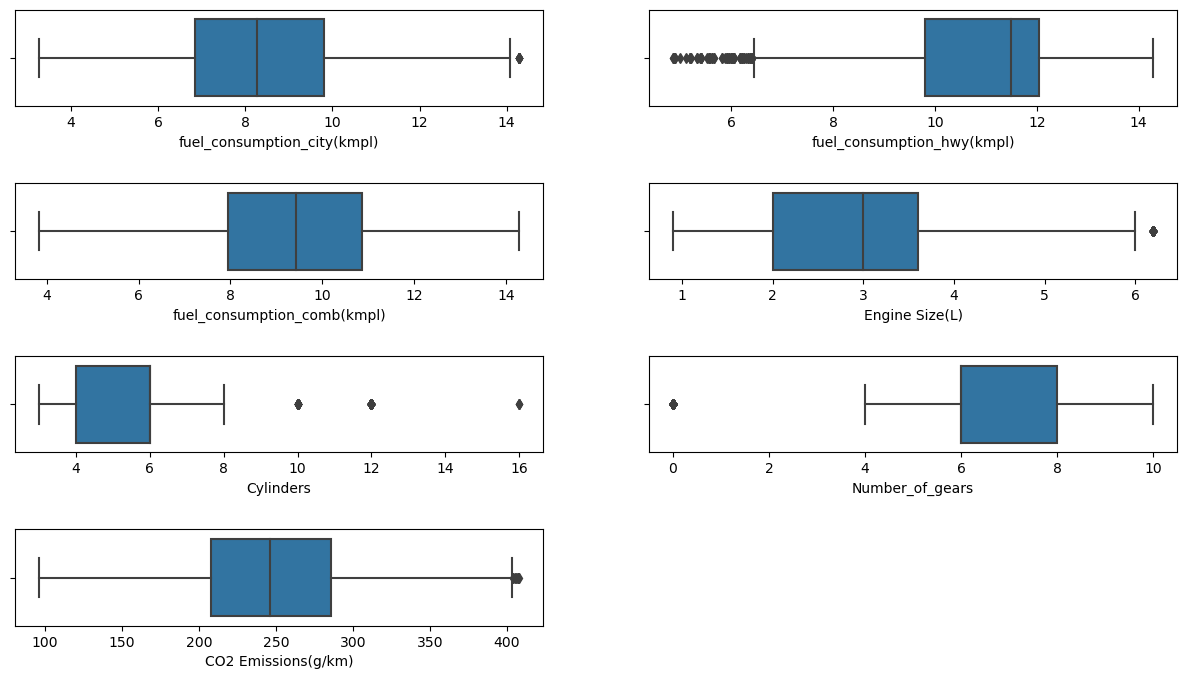

In [34]:
plt.figure(figsize=(15,8))

plt.subplots_adjust(hspace=0.8,wspace=0.2)

plt.subplot(4,2,1)
sns.boxplot(df['fuel_consumption_city(kmpl)'])

plt.subplot(4,2,2)
sns.boxplot(df['fuel_consumption_hwy(kmpl)'])

plt.subplot(4,2,3)
sns.boxplot(df['fuel_consumption_comb(kmpl)'])

plt.subplot(4,2,4)
sns.boxplot(df['Engine Size(L)'])

plt.subplot(4,2,5)
sns.boxplot(df['Cylinders'])

plt.subplot(4,2,6)
sns.boxplot(df['Number_of_gears'])

plt.subplot(4,2,7)
sns.boxplot(df['CO2 Emissions(g/km)'])


plt.show()

## Data prepration for train test split

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

In [36]:
X = df.drop('CO2 Emissions(g/km)',axis=1)
y = df['CO2 Emissions(g/km)']

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (5538, 8)
Shape of X_test: (1847, 8)


In [38]:
categorical_cols = []
numerical_cols = []

for col in X.columns:
    if X[col].dtypes=='object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [39]:
categorical_cols

['Fuel Type', 'Transmission_type']

In [40]:
numerical_cols

['Engine Size(L)',
 'Cylinders',
 'Number_of_gears',
 'fuel_consumption_city(kmpl)',
 'fuel_consumption_hwy(kmpl)',
 'fuel_consumption_comb(kmpl)']

### Encoding and Scaling

In [41]:
preprocessor = ColumnTransformer(
    transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(), categorical_cols)
    ])

In [42]:
col = ['Model','Training_Accuracy','Testing_Accuracy' ,'MSE',
       'RMSE','R_square','Adjusted_R_square','MAE','MAPE']

model_report = pd.DataFrame( columns=col)

In [43]:
model_report

,Model,Training_Accuracy,Testing_Accuracy,MSE,RMSE,R_square,Adjusted_R_square,MAE,MAPE


# Linear Regression:

In [44]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [45]:
lnr_reg = LinearRegression()

lnr_pipe = Pipeline(steps=[('preprocessor',preprocessor),('Linear',lnr_reg)])

lnr_pipe.fit(X_train,y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Engine Size(L)',
                                                   'Cylinders',
                                                   'Number_of_gears',
                                                   'fuel_consumption_city(kmpl)',
                                                   'fuel_consumption_hwy(kmpl)',
                                                   'fuel_consumption_comb(kmpl)']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Fuel Type',
                                                   'Transmission_type'])])),
                ('Linear', LinearRegression())])

In [46]:
lnr_pred = lnr_pipe.predict(X_test)

lnr_pred

array([249.375, 212.75 , 252.375, ..., 317.875, 271.625, 235.625])

## Model Evaluation:

In [47]:
from sklearn.metrics import mean_absolute_error as MAE 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import r2_score
import math

### Training and Test accuracy:

In [48]:
training_ac_lnr = round(lnr_pipe.score(X_train,y_train),4)
training_ac_lnr

0.8424

In [49]:
test_ac_lnr = round(lnr_pipe.score(X_test,y_test),4)
test_ac_lnr

0.8331

### R-squared and Adjusted R-squared:

In [50]:
r2_lnr = round(r2_score(y_true=y_test,y_pred=lnr_pred),4)
r2_lnr

0.8331

In [51]:
adj_r2_lnr = round(1 - ((1-r2_lnr)*(len(y)-1)/(len(y)-X.shape[1]-1)),4)
adj_r2_lnr

0.8329

### Mean squared error and Root mean Squared error

In [52]:
mse_lnr = round(MSE(y_true=y_test,y_pred=lnr_pred),4)
mse_lnr

499.4279

In [53]:
rmse_lnr = round(math.sqrt(mse_lnr),4)
rmse_lnr

22.3479

### Mean Absolute Error and Mean Absolute Percentage Error

In [54]:
mae_lnr = round(MAE(y_true=y_test,y_pred=lnr_pred),4)
mae_lnr

13.0747

In [55]:
mape_lnr = round(MAPE(y_true=y_test,y_pred=lnr_pred)*100,4)
mape_lnr

6.1224

In [56]:
lnr_row = {'Model': 'Linear_Regression',
           'Training_Accuracy': training_ac_lnr,
           'Testing_Accuracy' : test_ac_lnr ,
           'MSE': mse_lnr,
           'RMSE' :  rmse_lnr,
           'R_square' : r2_lnr,
           'Adjusted_R_square' : adj_r2_lnr,
           'MAE': mae_lnr,
           'MAPE':mape_lnr
                    } 

In [57]:
model_report.loc[0]=lnr_row

In [58]:
model_report

,Model,Training_Accuracy,Testing_Accuracy,MSE,RMSE,R_square,Adjusted_R_square,MAE,MAPE
0,Linear_Regression,0.8424,0.8331,499.4279,22.3479,0.8331,0.8329,13.0747,6.1224


# Lasso Regression

In [59]:
lso_reg = Lasso()

lso_pipe = Pipeline(steps=[('preprocessor',preprocessor),('Lasso',lso_reg)])

lso_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Engine Size(L)',
                                                   'Cylinders',
                                                   'Number_of_gears',
                                                   'fuel_consumption_city(kmpl)',
                                                   'fuel_consumption_hwy(kmpl)',
                                                   'fuel_consumption_comb(kmpl)']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Fuel Type',
                                                   'Transmission_type'])])),
                ('Lasso', Lasso())])

In [60]:
lso_pred = lso_pipe.predict(X_test)

lso_pred

array([246.74819519, 198.19311844, 259.24745932, ..., 311.9967167 ,
       266.77438051, 232.81666767])

### Training and Test accuracy:

In [61]:
training_ac_lso = round(lso_pipe.score(X_train,y_train),4)
training_ac_lso

0.8209

In [62]:
test_ac_lso = round(lso_pipe.score(X_test,y_test),4)
test_ac_lso

0.8139

### R-squared and Adjusted R-squared:

In [63]:
r2_lso = round(r2_score(y_true=y_test,y_pred=lso_pred),4)
r2_lso

0.8139

In [64]:
adj_r2_lso = round(1 - ((1-r2_lso)*(len(y)-1)/(len(y)-X.shape[1]-1)),4)
adj_r2_lso

0.8137

### Mean squared error and Root mean Squared error

In [65]:
mse_lso = round(MSE(y_true=y_test,y_pred=lso_pred),4)
mse_lso

557.0259

In [66]:
rmse_lso = round(math.sqrt(mse_lso),4)
rmse_lso

23.6014

### Mean Absolute Error and Mean Absolute Percentage Error

In [67]:
mae_lso = round(MAE(y_true=y_test,y_pred=lso_pred),4)
mae_lso

14.1946

In [68]:
mape_lso = round(MAPE(y_true=y_test,y_pred=lso_pred)*100,4)
mape_lso

6.4425

In [69]:
lso_row = {'Model': 'Linear_Regression',
           'Training_Accuracy': training_ac_lso,
           'Testing_Accuracy' : test_ac_lso ,
           'MSE': mse_lso,
           'RMSE' :  rmse_lso,
           'R_square' : r2_lso,
           'Adjusted_R_square' : adj_r2_lso,
           'MAE': mae_lso,
           'MAPE':mape_lso
                    } 

model_report.loc[1]=lso_row

# Ridge Regression

In [70]:
rdg_reg = Ridge()

rdg_pipe = Pipeline(steps=[('preprocessor',preprocessor),('Ridge',rdg_reg)])

rdg_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Engine Size(L)',
                                                   'Cylinders',
                                                   'Number_of_gears',
                                                   'fuel_consumption_city(kmpl)',
                                                   'fuel_consumption_hwy(kmpl)',
                                                   'fuel_consumption_comb(kmpl)']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Fuel Type',
                                                   'Transmission_type'])])),
                ('Ridge', Ridge())])

In [71]:
rdg_pred = rdg_pipe.predict(X_test)

rdg_pred

array([249.12991   , 213.42192519, 252.31061186, ..., 316.55969949,
       271.37426221, 236.70066306])

### Training and Test accuracy:

In [72]:
training_ac_rdg = round(rdg_pipe.score(X_train,y_train),4)
training_ac_rdg

0.843

In [73]:
test_ac_rdg = round(rdg_pipe.score(X_test,y_test),4)
test_ac_rdg

0.8346

### R-squared and Adjusted R-squared:

In [74]:
r2_rdg = round(r2_score(y_true=y_test,y_pred=rdg_pred),4)
r2_rdg

0.8346

In [75]:
adj_r2_rdg = round(1 - ((1-r2_rdg)*(len(y)-1)/(len(y)-X.shape[1]-1)),4)
adj_r2_rdg

0.8344

### Mean squared error and Root mean Squared error

In [76]:
mse_rdg = round(MSE(y_true=y_test,y_pred=rdg_pred),4)
mse_rdg

495.0238

In [77]:
rmse_rdg = round(math.sqrt(mse_rdg),4)
rmse_rdg

22.2491

### Mean Absolute Error and Mean Absolute Percentage Error

In [78]:
mae_rdg = round(MAE(y_true=y_test,y_pred=rdg_pred),4)
mae_rdg

12.8472

In [79]:
mape_rdg = round(MAPE(y_true=y_test,y_pred=rdg_pred)*100,4)
mape_rdg

6.0196

In [80]:
rdg_row = {'Model': 'Linear_Regression',
           'Training_Accuracy': training_ac_rdg,
           'Testing_Accuracy' : test_ac_rdg ,
           'MSE': mse_rdg,
           'RMSE' :  rmse_rdg,
           'R_square' : r2_rdg,
           'Adjusted_R_square' : adj_r2_rdg,
           'MAE': mae_rdg,
           'MAPE':mape_rdg
                    } 

model_report.loc[2]=rdg_row

In [81]:
model_report

,Model,Training_Accuracy,Testing_Accuracy,MSE,RMSE,R_square,Adjusted_R_square,MAE,MAPE
0,Linear_Regression,0.8424,0.8331,499.4279,22.3479,0.8331,0.8329,13.0747,6.1224
1,Linear_Regression,0.8209,0.8139,557.0259,23.6014,0.8139,0.8137,14.1946,6.4425
2,Linear_Regression,0.8430,0.8346,495.0238,22.2491,0.8346,0.8344,12.8472,6.0196


# Decision Tree Regressor Model

In [82]:
from sklearn.tree import DecisionTreeRegressor

In [83]:
dt_reg = DecisionTreeRegressor()

In [84]:
dt_pipe = Pipeline(steps=[('preprocessor',preprocessor),('dt_regressor',dt_reg)])

dt_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Engine Size(L)',
                                                   'Cylinders',
                                                   'Number_of_gears',
                                                   'fuel_consumption_city(kmpl)',
                                                   'fuel_consumption_hwy(kmpl)',
                                                   'fuel_consumption_comb(kmpl)']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Fuel Type',
                                                   'Transmission_type'])])),
                ('dt_regressor', DecisionTreeRegressor())])

In [85]:
dt_pred = dt_pipe.predict(X_test)

In [86]:
dt_pred

array([241., 229., 257., ..., 315., 269., 243.])

#### Training and Test Accuracy:

In [87]:
training_ac_dt = round(dt_pipe.score(X_train,y_train),4)
training_ac_dt

0.9991

In [88]:
test_ac_dt = round(dt_pipe.score(X_test,y_test),4)
test_ac_dt

0.991

#### R-squared and Adjusted R-squared:

In [89]:
r2_dt = round(r2_score(y_true=y_test,y_pred=dt_pred),4)
r2_dt

0.991

In [90]:
adj_r2_dt = round(1 - ((1-r2_dt)*(len(y)-1)/(len(y)-X.shape[1]-1)),4)
adj_r2_dt

0.991

#### Mean Squared error and Root Mean Squared error:

In [91]:
mse_dt = round(MSE(y_true=y_test,y_pred=dt_pred),4)
mse_dt

26.8144

In [92]:
rmse_dt = round(math.sqrt(mse_dt),4)
rmse_dt

5.1783

#### Mean Absolute Error and Mean Absolute Percentage Error

In [93]:
mae_dt = round(MAE(y_true=y_test,y_pred=dt_pred),4)
mae_dt

1.8733

In [94]:
mape_dt = round(MAPE(y_true=y_test,y_pred=dt_pred)*100,4)
mape_dt

0.8761

In [95]:
dtr_row =  {
            'Model': 'DecisionTreeRegressor',
            'Training_Accuracy': training_ac_dt,
            'Testing_Accuracy' : test_ac_dt,
            'MSE': mse_dt,
            'RMSE' :  rmse_dt,
            'R_square'   : r2_dt,
            'Adjusted_R_square' : adj_r2_dt,
            'MAE': mae_dt,
            'MAPE':mape_dt
                    }  
                   

In [96]:
model_report.loc[3] = dtr_row

In [97]:
model_report

,Model,Training_Accuracy,Testing_Accuracy,MSE,RMSE,R_square,Adjusted_R_square,MAE,MAPE
0,Linear_Regression,0.8424,0.8331,499.4279,22.3479,0.8331,0.8329,13.0747,6.1224
1,Linear_Regression,0.8209,0.8139,557.0259,23.6014,0.8139,0.8137,14.1946,6.4425
2,Linear_Regression,0.8430,0.8346,495.0238,22.2491,0.8346,0.8344,12.8472,6.0196
3,DecisionTreeRegressor,0.9991,0.9910,26.8144,5.1783,0.9910,0.9910,1.8733,0.8761


# SVR:

In [98]:
from sklearn.svm import SVR

svr = SVR()

In [99]:
svr_pipe = Pipeline(steps=[('preprocessor',preprocessor),('SVR',svr)])

svr_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Engine Size(L)',
                                                   'Cylinders',
                                                   'Number_of_gears',
                                                   'fuel_consumption_city(kmpl)',
                                                   'fuel_consumption_hwy(kmpl)',
                                                   'fuel_consumption_comb(kmpl)']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Fuel Type',
                                                   'Transmission_type'])])),
                ('SVR', SVR())])

In [100]:
svr_pred = svr_pipe.predict(X_test)

svr_pred

array([240.09436244, 210.55555645, 251.33027552, ..., 317.30179452,
       275.21173943, 243.48988346])

### Training and Test Accuracy:


In [101]:
training_ac_svr = round(svr_pipe.score(X_train,y_train),4)
training_ac_svr

0.8542

In [102]:
test_ac_svr = round(svr_pipe.score(X_test,y_test),4)
test_ac_svr

0.8439

### R-squared and Adjusted R-squared:

In [103]:
r2_svr = round(r2_score(y_true=y_test,y_pred=svr_pred),4)
r2_svr

0.8439

In [104]:
adj_r2_svr = round(1 - ((1-r2_svr)*(len(y)-1)/(len(y)-X.shape[1]-1)),4)
adj_r2_svr

0.8437

### Mean Squared error and Root Mean Squared error:

In [105]:
mse_svr = round(MSE(y_true=y_test,y_pred=svr_pred),4)
mse_svr

467.05

In [106]:
rmse_svr = round(math.sqrt(mse_svr),4)
rmse_svr

21.6113

### Mean Absolute Error and Mean Absolute Percentage Error

In [107]:
mae_svr = round(MAE(y_true=y_test,y_pred=svr_pred),4)
mae_svr

10.1788

In [108]:
mape_svr = round(MAPE(y_true=y_test,y_pred=svr_pred)*100,4)
mape_svr

4.8311

In [109]:
svr_row = {'Model': 'SVR',
           'Training_Accuracy': training_ac_svr,
           'Testing_Accuracy' : test_ac_svr ,
           'MSE': mse_svr,
           'RMSE' :  rmse_svr,
           'R_square' : r2_svr,
           'Adjusted_R_square' : adj_r2_svr,
           'MAE': mae_svr,
           'MAPE':mape_svr
                    }                   
                

In [110]:
model_report.loc[4] = svr_row

In [111]:
model_report

,Model,Training_Accuracy,Testing_Accuracy,MSE,RMSE,R_square,Adjusted_R_square,MAE,MAPE
0,Linear_Regression,0.8424,0.8331,499.4279,22.3479,0.8331,0.8329,13.0747,6.1224
1,Linear_Regression,0.8209,0.8139,557.0259,23.6014,0.8139,0.8137,14.1946,6.4425
2,Linear_Regression,0.8430,0.8346,495.0238,22.2491,0.8346,0.8344,12.8472,6.0196
3,DecisionTreeRegressor,0.9991,0.9910,26.8144,5.1783,0.9910,0.9910,1.8733,0.8761
4,SVR,0.8542,0.8439,467.0500,21.6113,0.8439,0.8437,10.1788,4.8311


The Decision Tree Regressor shows the best fit but is prone to overfitting. SVR is the second best  model.